**NLP Project Round-I Team Excelsior**
===
Team Excelsior:  <br>
```1. Parth Patel (18UCS015)``` <br>
```2. Mavani Deep Vinodbhai (18UCS033)``` <br>
```3. Siddharth Singhvi (18UCS069)``` <br>
```4. Pinkesh Bhaveshkumar Unadkat (18UCS091)```

In [1]:
""" Importing the necessary libraries like:
nltk, matplotlib, wordcloud, re, urllib, collections
"""
import nltk
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")

from urllib.request import urlopen
import re
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
# Method definitions

""" Method to plot word cloud given an object
of wordcloud and title
"""
def plotWordCloud(wordcloud, title):
  plt.figure(figsize=(20, 15))
  plt.title(title)
  plt.imshow(wordcloud) 
  plt.axis("off");

""" Method to plot frequency distribution given
an object of FreqDist and title
"""
def plotFreqDist(freqdist, title):
  plt.figure(figsize=(20, 15))
  freqdist.plot(50, title=title)

In [3]:
# Opening urls to the books on Project Gutenberg E-Book Resource

""" Url to the book Dead Men Tell No Tales - E. W. Hornung
"""
urlBook1 = "http://www.gutenberg.org/files/1703/1703-0.txt"
rawBook1 = urlopen(urlBook1).read()
""" Url to the book The Picture of Dorian Gray - Oscar Wilde
"""
urlBook2 = "http://www.gutenberg.org/cache/epub/174/pg174.txt"
rawBook2 = urlopen(urlBook2).read()

In [4]:
""" Decoding the UTF-8 text obtained from the url
"""
rawBook1 = rawBook1.decode("utf-8")
rawBook2 = rawBook2.decode("utf-8")

In [5]:
# Cleaning the raw text using regular expressions

""" Removing the byte order mark aka BOM
"""
cleanedBook1 = re.sub("\ufeff", "", rawBook1)
cleanedBook2 = re.sub("\ufeff", "", rawBook2)
""" Removing the unnecessary line feeds and
carrier feeds
"""
cleanedBook1 = re.sub("(\r\n)+", "\n", cleanedBook1)
cleanedBook2 = re.sub("(\r\n)+", "\n", cleanedBook2)
cleanedBook1 = cleanedBook1.splitlines()
cleanedBook2 = cleanedBook2.splitlines()
cleanedBook1 = " ".join([str(s) for s in cleanedBook1])
cleanedBook2 = " ".join([str(s) for s in cleanedBook2])
""" Removing the Project Gutenberg's license and
copyright details from the beginning and end of 
the texts 
"""
cleanedBook1 = re.sub("The Project Gutenberg.*Chapter XVIII  The Statement of Francis Rattray ", "", cleanedBook1)
cleanedBook1 = re.sub(" End of the Project Gutenberg.*", "", cleanedBook1)
cleanedBook2 = re.sub("The Project Gutenberg.*OSCAR WILDE ", "", cleanedBook2)
cleanedBook2 = re.sub(" End of Project Gutenberg\'s.*", "", cleanedBook2)
""" Removing chapter numbers and their corresponding
chapter names from the texts
"""
cleanedBook1 = re.sub("(CHAPTER [A-Z]*. ([A-Z]* )+)", "", cleanedBook1)
cleanedBook2 = re.sub("CHAPTER [0-9]{,2} ", "", cleanedBook2)

In [6]:
""" Word tokenization of the cleaned text
"""
tokensBook1 = nltk.word_tokenize(cleanedBook1)
tokensBook2 = nltk.word_tokenize(cleanedBook2)

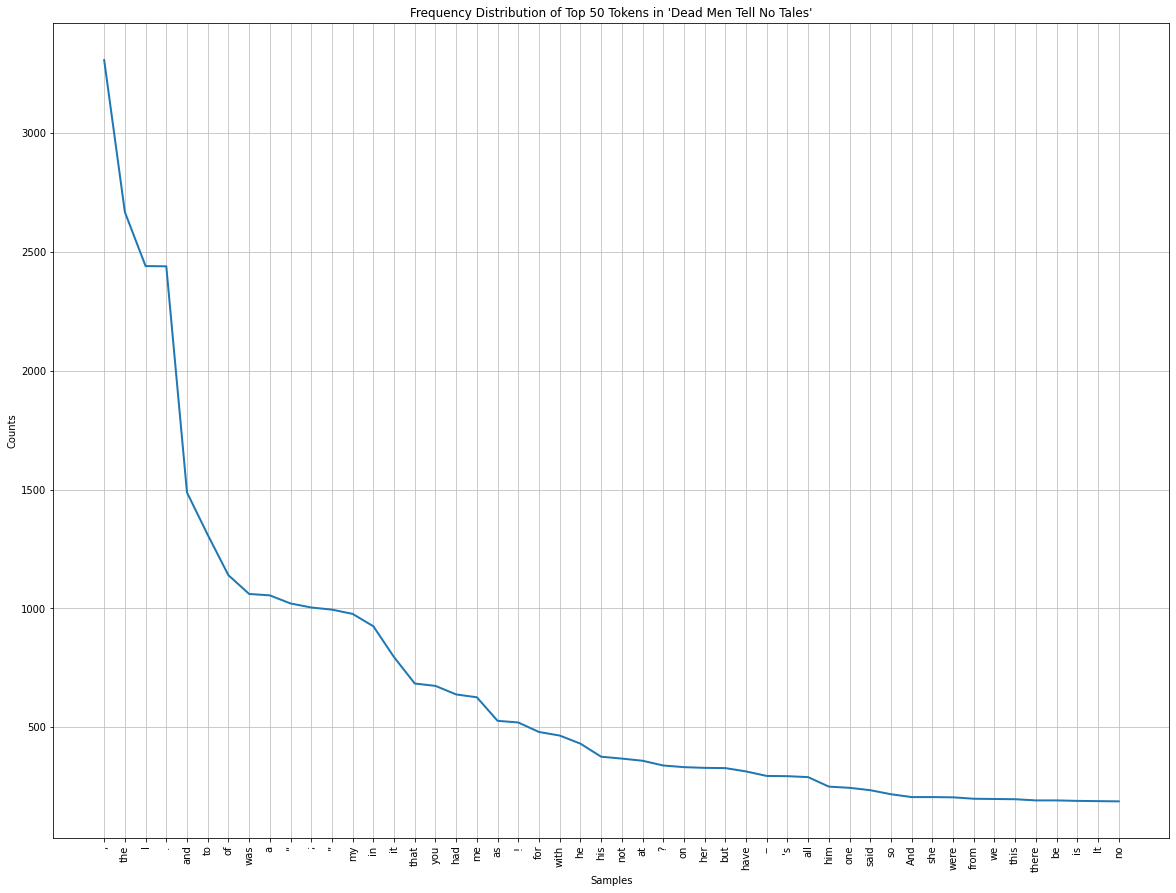

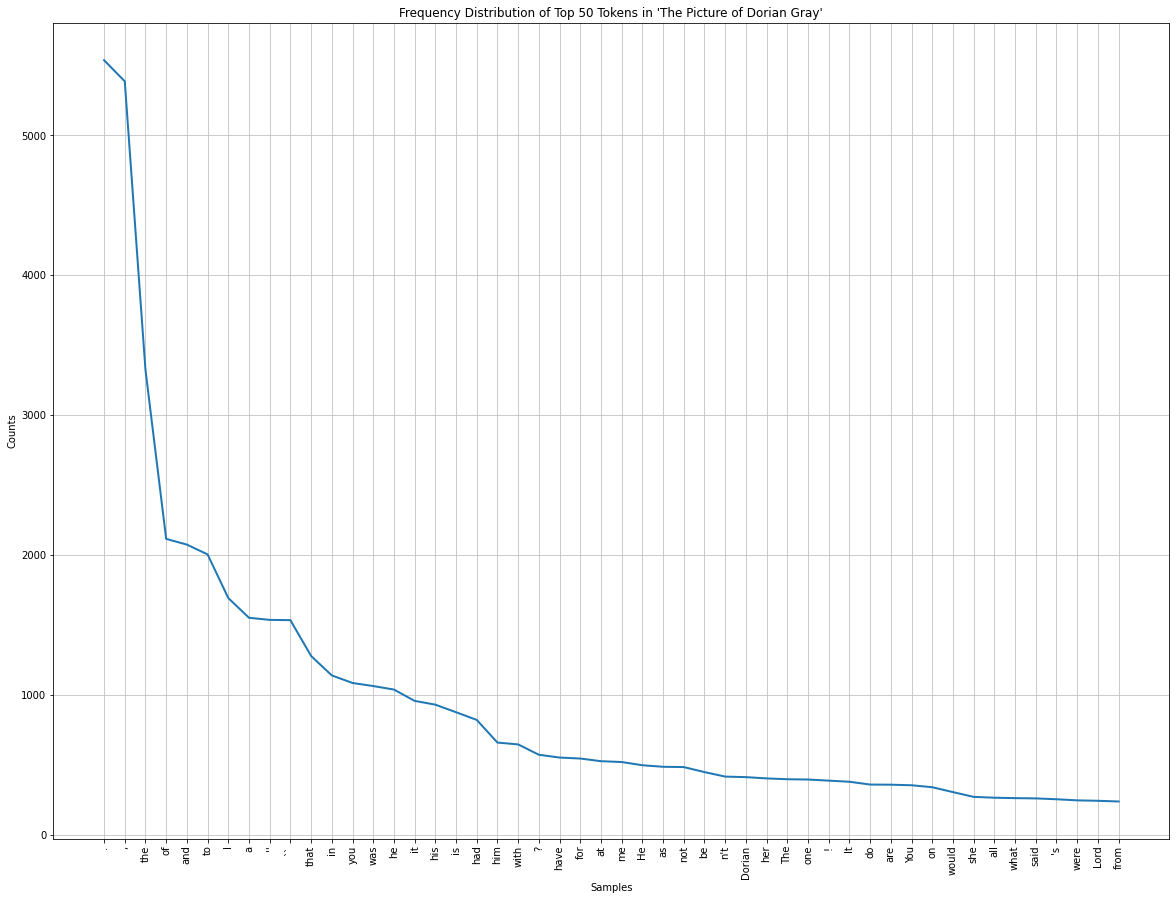

In [7]:
""" Frequency distribution of 50 most frequent tokens
"""
freqDistTokensBook1 = nltk.probability.FreqDist(tokensBook1)
plotFreqDist(freqDistTokensBook1, "Frequency Distribution of Top 50 Tokens in \'Dead Men Tell No Tales\'")
freqDistTokensBook2 = nltk.probability.FreqDist(tokensBook2)
plotFreqDist(freqDistTokensBook2, "Frequency Distribution of Top 50 Tokens in \'The Picture of Dorian Gray\'")

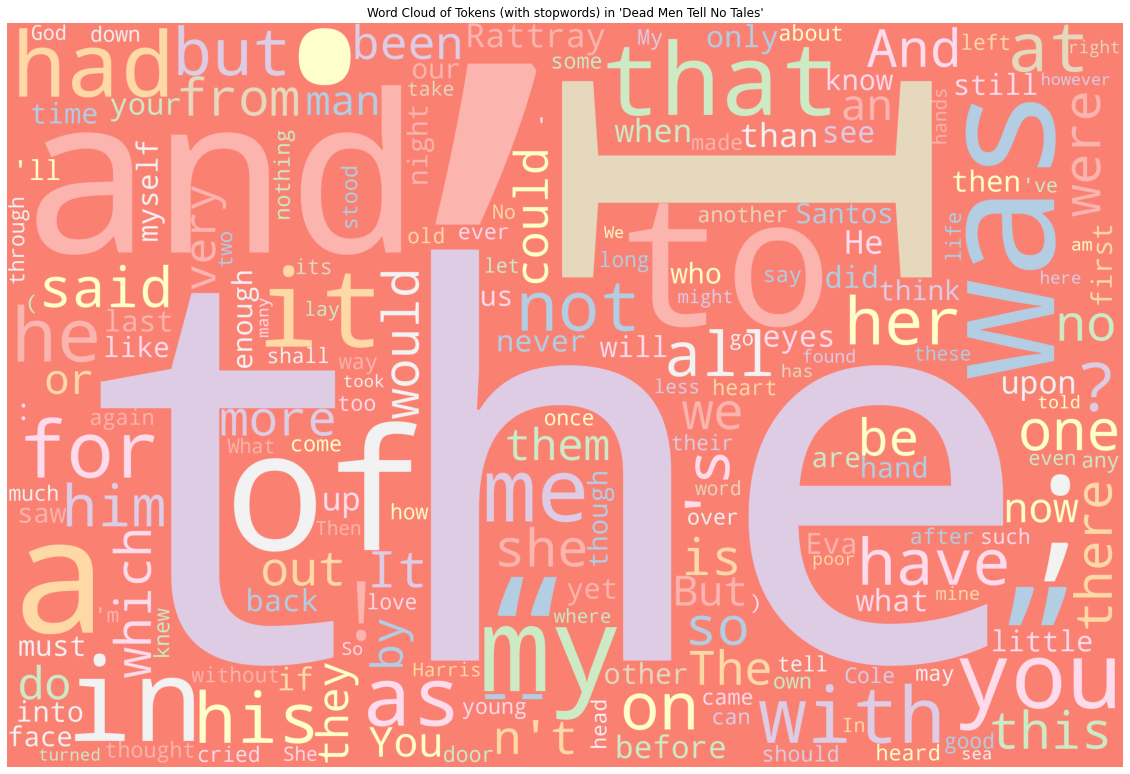

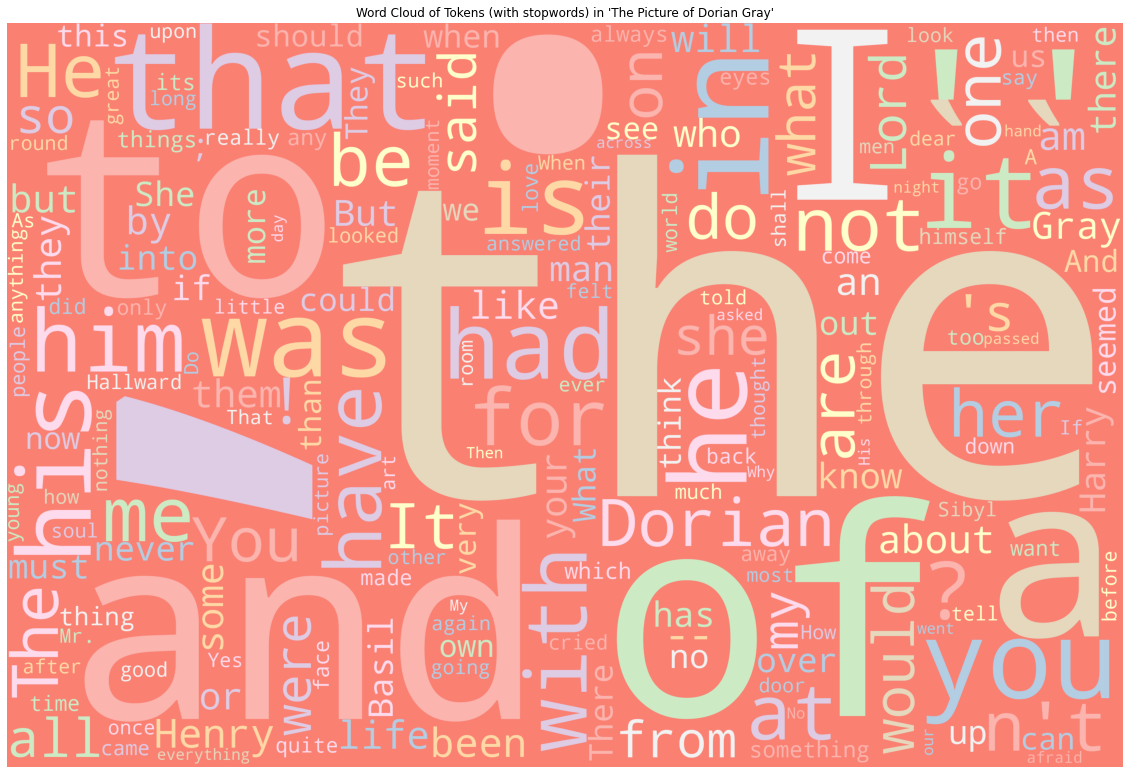

In [8]:
""" Word cloud of texts including the stopwords
"""
dictTokensBook1 = Counter(tokensBook1)
wordCloudWithStopWordsTokensBook1 = WordCloud(width=3000, height=2000, random_state=1, background_color="salmon", colormap="Pastel1").generate_from_frequencies(dictTokensBook1)
plotWordCloud(wordCloudWithStopWordsTokensBook1, "Word Cloud of Tokens (with stopwords) in \'Dead Men Tell No Tales\'")
dictTokensBook2 = Counter(tokensBook2)
wordCloudWithStopWordsTokensBook2 = WordCloud(width=3000, height=2000, random_state=1, background_color="salmon", colormap="Pastel1").generate_from_frequencies(dictTokensBook2)
plotWordCloud(wordCloudWithStopWordsTokensBook2, "Word Cloud of Tokens (with stopwords) in \'The Picture of Dorian Gray\'")

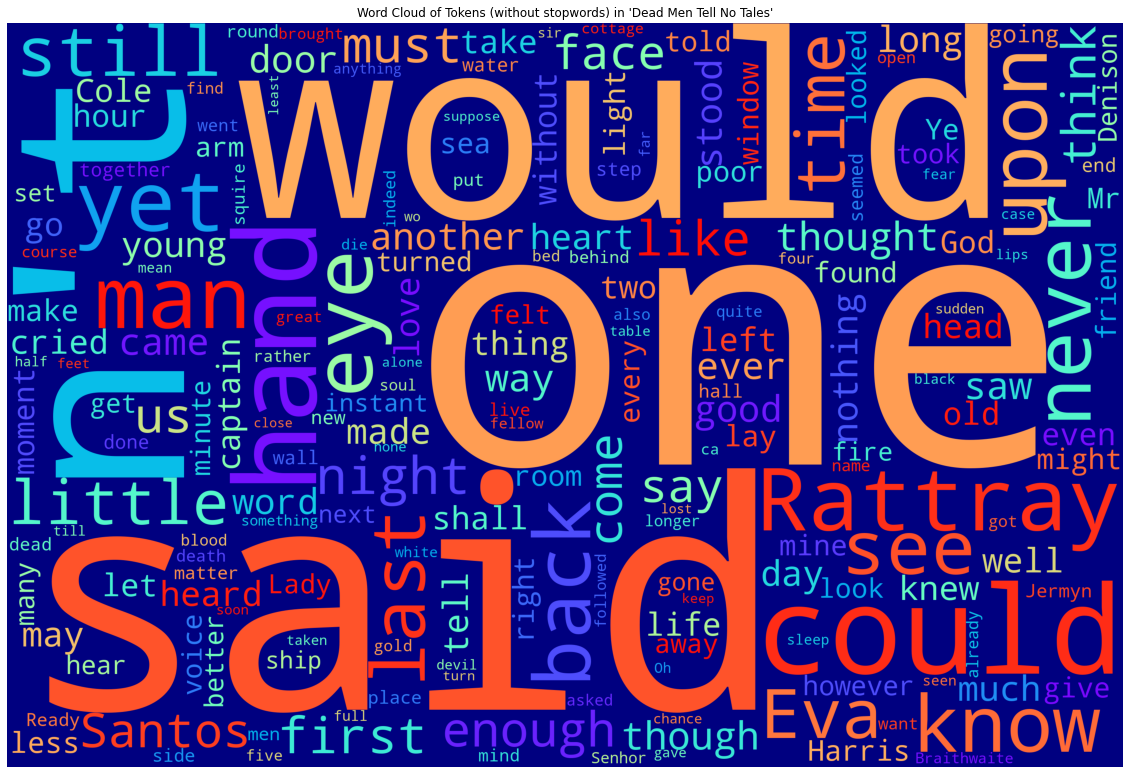

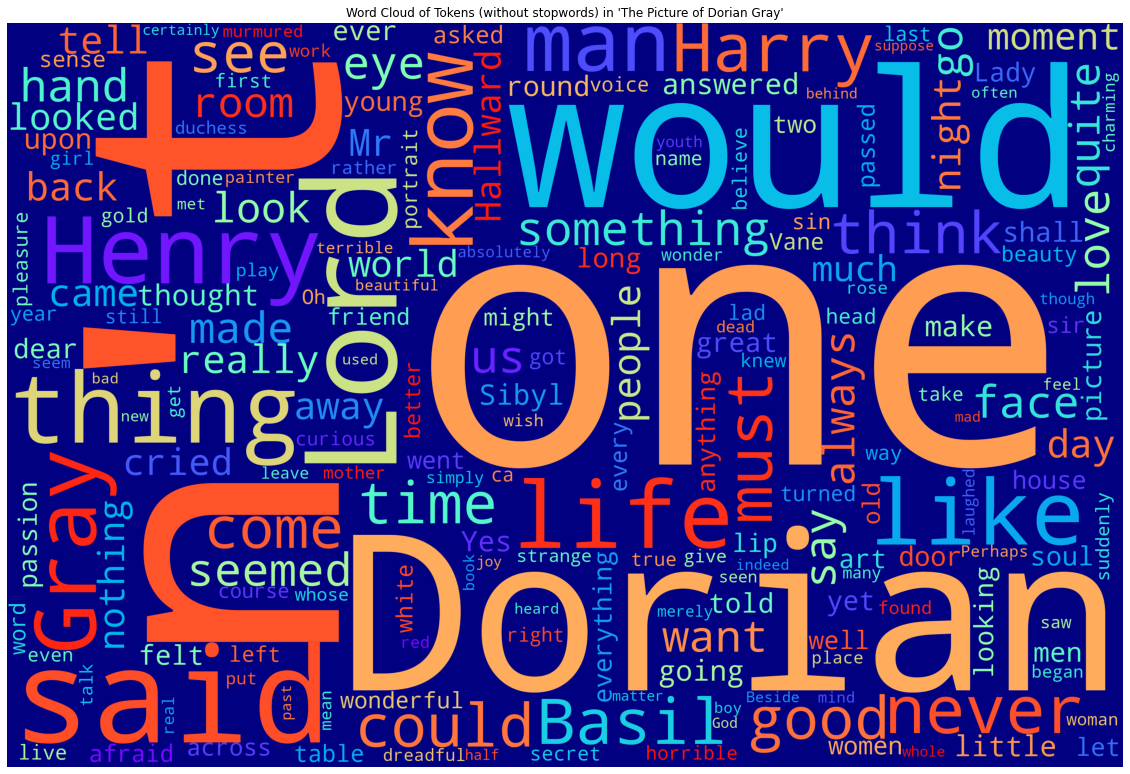

In [9]:
""" Word cloud of texts excluding the stopwords
"""
wordCloudWithoutStopWordsTokensBook1 = WordCloud(width=3000, height=2000, random_state=1, background_color="navy", colormap="rainbow", collocations=False, stopwords=nltk.corpus.stopwords.words("english")).generate(' '.join([str(s) for s in tokensBook1]))
plotWordCloud(wordCloudWithoutStopWordsTokensBook1, "Word Cloud of Tokens (without stopwords) in \'Dead Men Tell No Tales\'")
wordCloudWithoutStopWordsTokensBook2 = WordCloud(width=3000, height=2000, random_state=1, background_color="navy", colormap="rainbow", collocations=False, stopwords=nltk.corpus.stopwords.words("english")).generate(' '.join([str(s) for s in tokensBook2]))
plotWordCloud(wordCloudWithoutStopWordsTokensBook2, "Word Cloud of Tokens (without stopwords) in \'The Picture of Dorian Gray\'")

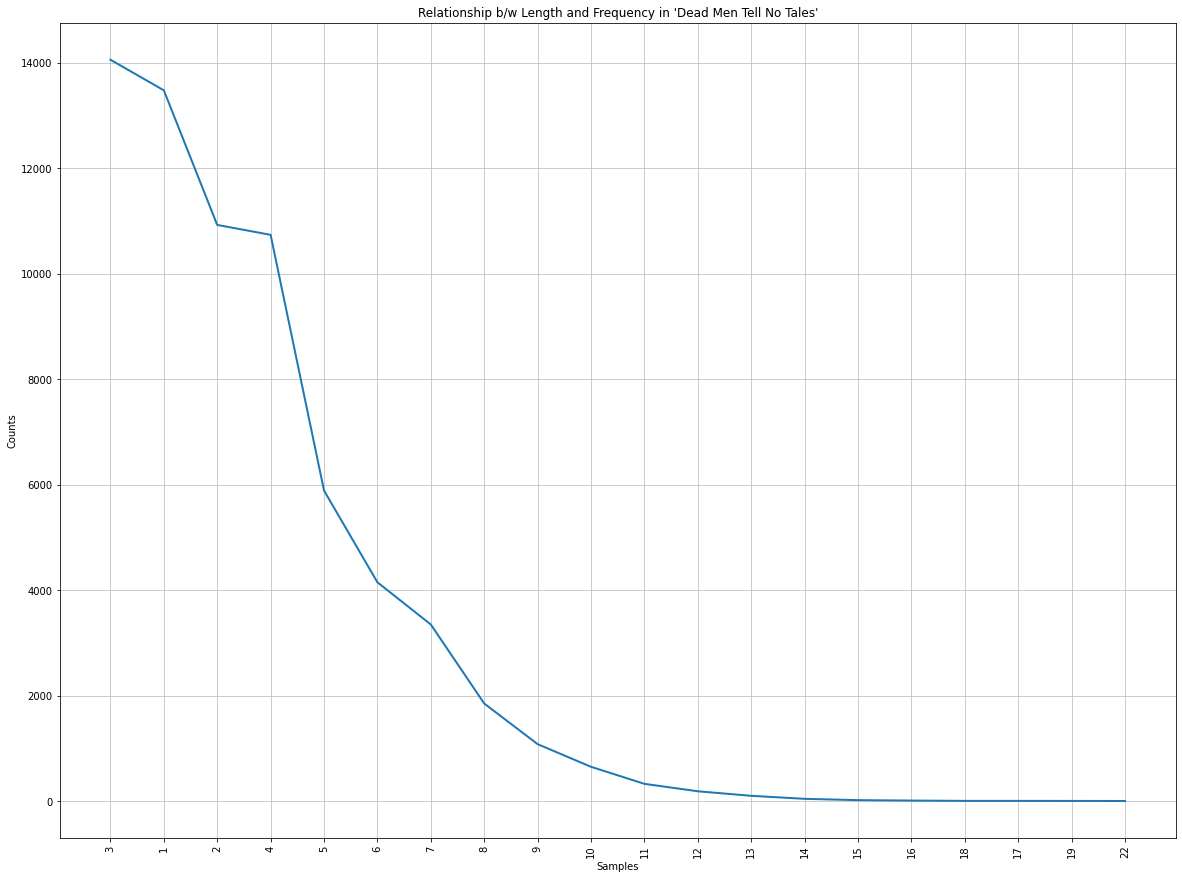

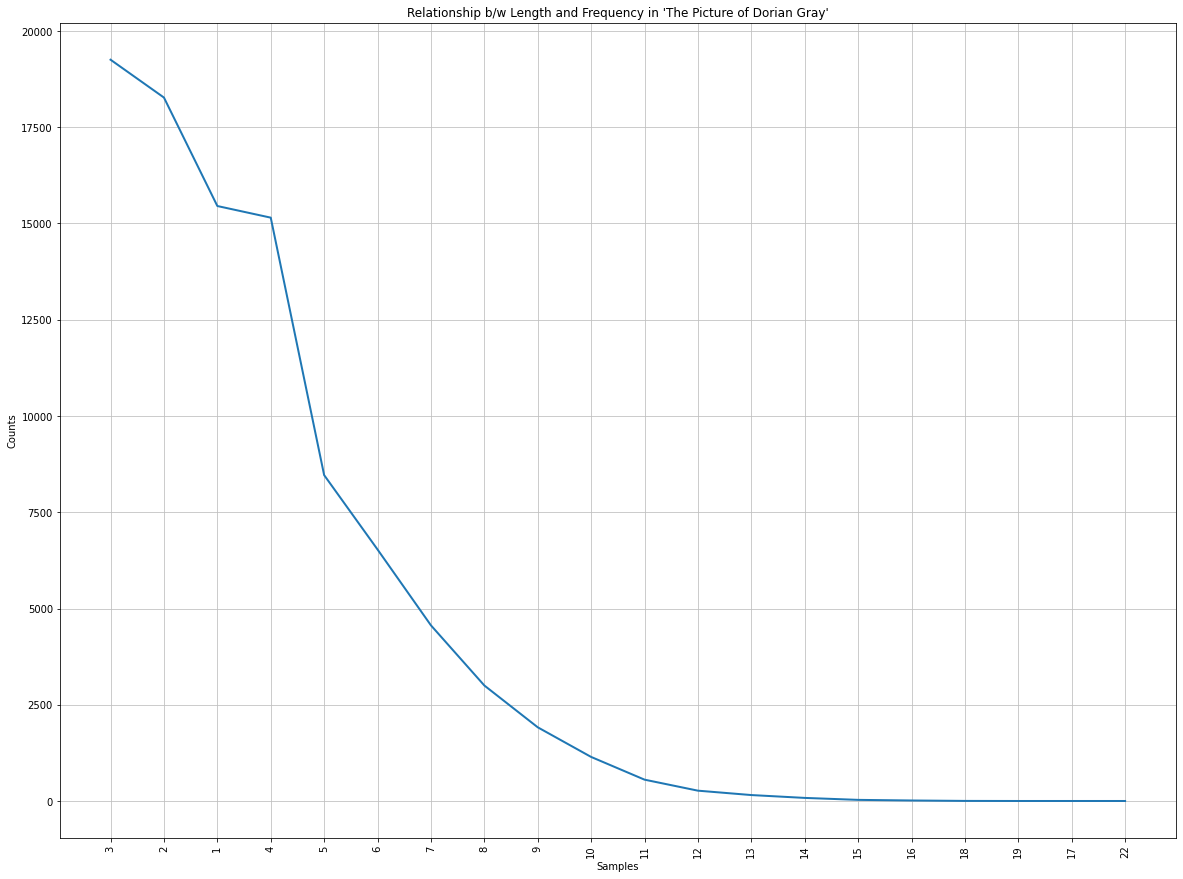

In [10]:
""" Frequency distribution for word lengths
"""
freqDistLengthBook1 = nltk.probability.FreqDist()
for token in tokensBook1:
  freqDistLengthBook1[len(token)] += 1
plotFreqDist(freqDistLengthBook1, "Relationship b/w Length and Frequency in \'Dead Men Tell No Tales\'")
freqDistLengthBook2 = nltk.probability.FreqDist()
for token in tokensBook2:
  freqDistLengthBook2[len(token)] += 1
plotFreqDist(freqDistLengthBook2, "Relationship b/w Length and Frequency in \'The Picture of Dorian Gray\'")

In [11]:
""" PoS tagging for the tokens of both the books
using Penn Treebank PoS TagSet
"""
taggedBook1 = nltk.pos_tag(tokensBook1)
taggedBook2 = nltk.pos_tag(tokensBook2)

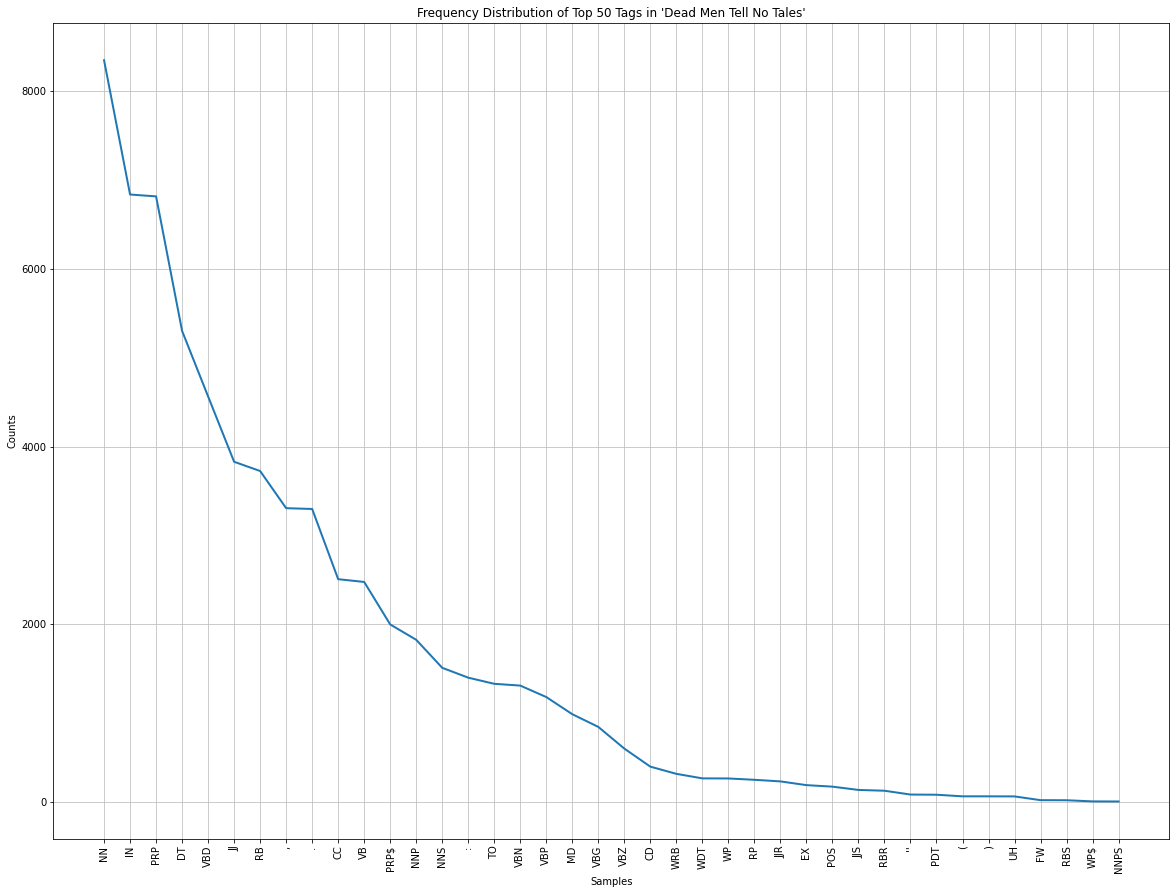

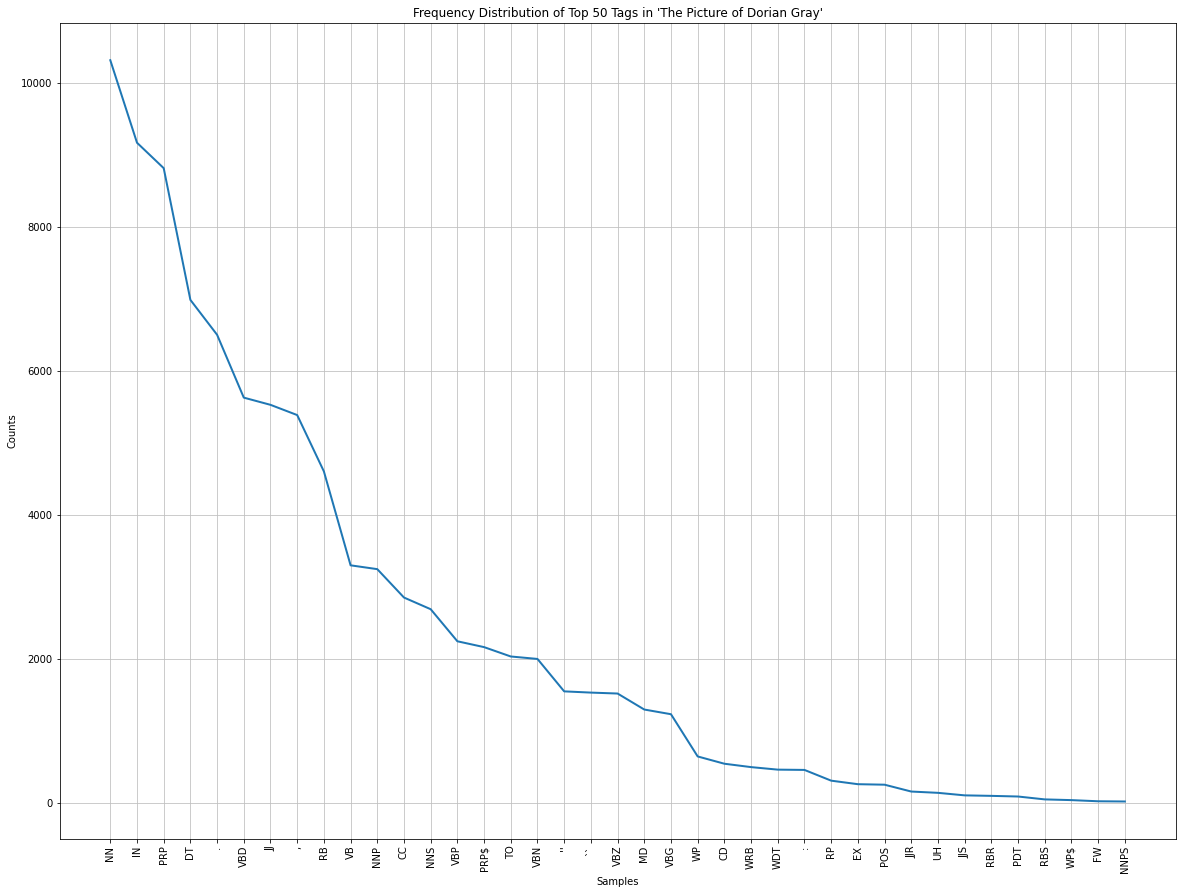

In [12]:
""" Frequency distribution for 50 most frequent tags
"""
freqDistTagsBook1 = nltk.probability.FreqDist(tag for (word, tag) in taggedBook1)
plotFreqDist(freqDistTagsBook1, "Frequency Distribution of Top 50 Tags in \'Dead Men Tell No Tales\'")
freqDistTagsBook2 = nltk.probability.FreqDist(tag for (word, tag) in taggedBook2)
plotFreqDist(freqDistTagsBook2, "Frequency Distribution of Top 50 Tags in \'The Picture of Dorian Gray\'")